<a href="https://colab.research.google.com/github/dipashreepatil/AML-learning-mlds-/blob/main/Approach_mlds_n2_winequality_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv("/content/winequality-red.csv - Sheet1.csv")


In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
#a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3 : 0,
    4 : 1,
    5 : 2,
    6 : 3,
    7 : 4,
    8 : 5
}
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)


In [11]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier(max_depth = 10)

cols = ['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
print("train accuracy", train_accuracy)
print("test accuracy", test_accuracy)


train accuracy 0.907
test accuracy 0.5342237061769616


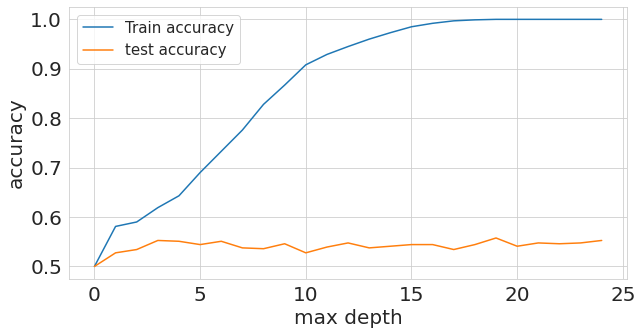

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)
%matplotlib inline

train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  cols = ['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

  clf.fit(df_train[cols], df_train.quality)

  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])

  train_accuracy = metrics.accuracy_score(
      df_train.quality, train_predictions
  )

  test_accuracy = metrics.accuracy_score(
      df_test.quality, test_predictions
  )

  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label = "Train accuracy")
plt.plot(test_accuracies, label = "test accuracy")
plt.legend(loc="upper left", prop = {'size' : 15})
plt.xticks(range(0,26,5))
plt.xlabel("max depth",size=20)
plt.ylabel("accuracy",size = 20)
plt.show()